In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import * 
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *



# Set the random seed
np.random.seed(1337)



In [ ]:
# help from https://medium.com/analytics-vidhya/predict-artist-from-art-using-deep-learning-9f465f8879d7
batch_size = 20
t_in_shape = (100,100,3)

# doing roughly 0.8:0.1:0.1 train:valid:test split
# test is roughly 0.1 the original dataset size
train_datagen = ImageDataGenerator(validation_split=0.1,
                                   rescale=1./255.,
                                   shear_range=5,
                                   horizontal_flip=True,
                                   vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(directory='./paintings_450',
                                                    class_mode='categorical',
                                                    target_size=t_in_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True)
valid_generator = train_datagen.flow_from_directory(directory='./paintings_450',
                                                    class_mode='categorical',
                                                    target_size=t_in_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True)
test_generator = test_datagen.flow_from_directory(directory='./painting_test',
                                                  class_mode='categorical',
                                                  target_size=t_in_shape[0:2],
                                                  batch_size=batch_size,
                                                  shuffle=True)

step_train = train_generator.n//train_generator.batch_size
step_valid = valid_generator.n//valid_generator.batch_size

Found 3973 images belonging to 10 classes.
Found 438 images belonging to 10 classes.
Found 435 images belonging to 10 classes.


In [ ]:
base_model = ResNet50(include_top=False, input_shape=t_in_shape)

In [ ]:
X = base_model.output
X = Flatten()(X)
X = Dense(512, kernel_initializer='he_uniform')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = Dense(16, kernel_initializer='he_uniform')(X)
X = Activation('relu')(X)
out = Dense(10, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs = out)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, verbose=1)
history = model.fit(train_generator, steps_per_epoch=step_train,
                    validation_data=valid_generator, epochs=10,
                    validation_steps=step_valid, callbacks=[reduce_lr],
                    )

Epoch 1/10
198/198 [==============================] - 77s 340ms/step - loss: 1.4637 - accuracy: 0.5267 - val_loss: 5.2138 - val_accuracy: 0.0976 - lr: 1.0000e-04
Epoch 2/10
198/198 [==============================] - 65s 330ms/step - loss: 0.8702 - accuracy: 0.7318 - val_loss: 6.8624 - val_accuracy: 0.0952 - lr: 1.0000e-04
Epoch 3/10
198/198 [==============================] - 65s 330ms/step - loss: 0.5871 - accuracy: 0.8186 - val_loss: 3.4007 - val_accuracy: 0.1238 - lr: 1.0000e-04
Epoch 4/10
198/198 [==============================] - 65s 329ms/step - loss: 0.4144 - accuracy: 0.8743 - val_loss: 2.8454 - val_accuracy: 0.3262 - lr: 1.0000e-04
Epoch 5/10
198/198 [==============================] - 64s 325ms/step - loss: 0.3197 - accuracy: 0.9054 - val_loss: 2.0391 - val_accuracy: 0.5167 - lr: 1.0000e-04
Epoch 6/10
198/198 [==============================] - 66s 332ms/step - loss: 0.2575 - accuracy: 0.9206 - val_loss: 1.2649 - val_accuracy: 0.6524 - lr: 1.0000e-04
Epoch 7/10
198/198 [========

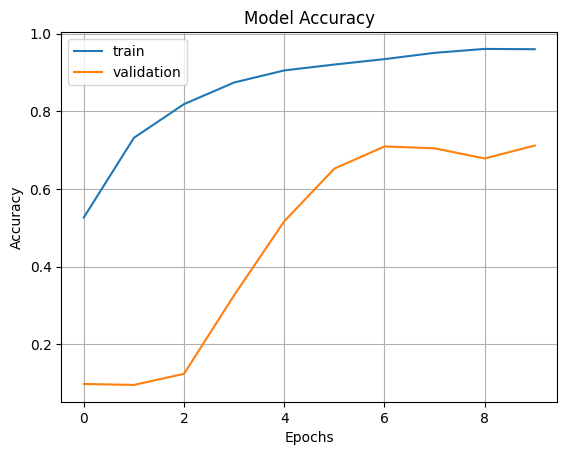

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

22/22 [==============================] - 6s 282ms/step - loss: 1.0465 - accuracy: 0.7448
Test loss: 1.0464609861373901
Test accuracy: 0.7448275685310364
